In [4]:
# page21

import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()

X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label

print("breast_cancer_shape=\n", cancer_df.shape)
print("breast_cancer_dataset=\n", cancer_df.head(3))


breast_cancer_shape=
 (569, 31)
breast_cancer_dataset=
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  wors

In [5]:
# page23

print("target names=",dataset.target_names)
print("value count=",cancer_df['target'].value_counts())

target names= ['malignant' 'benign']
value count= target
1    357
0    212
Name: count, dtype: int64


In [7]:
# page24

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [8]:
# page25

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest= xgb.DMatrix(data=X_test, label=y_test)

params = {
    'max_depth':3,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds = 400


In [9]:
# page26

wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-logloss:0.44525	eval-logloss:0.44332
[1]	train-logloss:0.32225	eval-logloss:0.33827
[2]	train-logloss:0.24489	eval-logloss:0.27549
[3]	train-logloss:0.19109	eval-logloss:0.23061
[4]	train-logloss:0.15452	eval-logloss:0.19916
[5]	train-logloss:0.12328	eval-logloss:0.17565
[6]	train-logloss:0.10035	eval-logloss:0.14760
[7]	train-logloss:0.08440	eval-logloss:0.13579
[8]	train-logloss:0.07126	eval-logloss:0.12400
[9]	train-logloss:0.06090	eval-logloss:0.11394
[10]	train-logloss:0.05263	eval-logloss:0.10560
[11]	train-logloss:0.04648	eval-logloss:0.10146
[12]	train-logloss:0.04094	eval-logloss:0.09928
[13]	train-logloss:0.03631	eval-logloss:0.09361
[14]	train-logloss:0.03247	eval-logloss:0.08696
[15]	train-logloss:0.02954	eval-logloss:0.08361
[16]	train-logloss:0.02653	eval-logloss:0.08338
[17]	train-logloss:0.02416	eval-logloss:0.07922
[18]	train-logloss:0.02231	eval-logloss:0.08059
[19]	train-logloss:0.02056	eval-logloss:0.07794
[20]	train-logloss:0.01917	eval-logloss:0.07655
[2

In [13]:
# page27

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시=',preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.968 0.007 0.92  0.092 0.99  1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시= [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [14]:
# page28

def get_clf_eval(y_test, y_pred):
  confusion = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred)
  print('오차행렬:\n', confusion)
  print()
  print('accuracy:{:.4f}'.format(accuracy))
  print('precision:{:.4f}'.format(precision))
  print('recall:{:.4f}'.format(recall))
  print('f1:{:.4f}'.format(f1))
  print('auc:{:.4f}'.format(auc))

get_clf_eval(y_test, preds)

오차행렬:
 [[35  2]
 [ 1 76]]

accuracy:0.9737
precision:0.9744
recall:0.9870
f1:0.9806
auc:0.9665


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

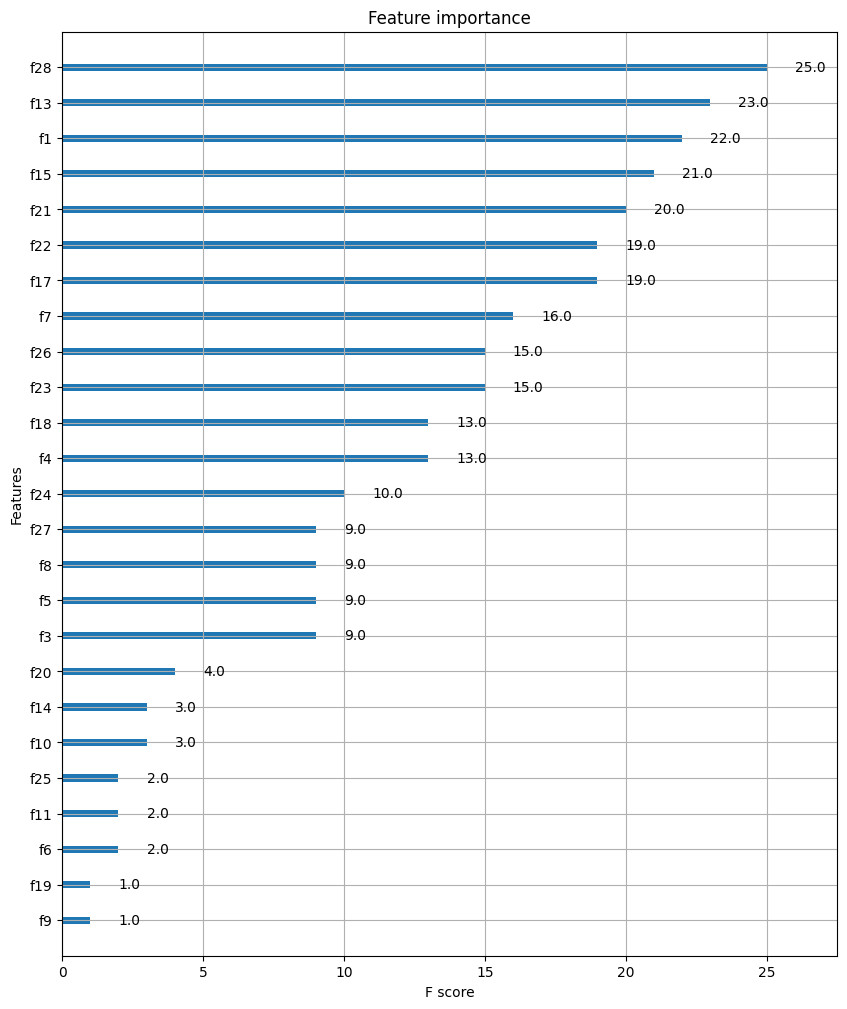

In [15]:
# page29

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [17]:
# page30

xgb.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None,
       maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0,
       callbacks=None, shuffle=True)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.446850,0.005007,0.464890,0.007759
1,0.324710,0.001023,0.359967,0.017837
2,0.244826,0.000940,0.295986,0.024704
3,0.191760,0.001598,0.253530,0.028563
4,0.152228,0.001400,0.214633,0.028992
5,0.123035,0.001830,0.189778,0.030221
6,0.101802,0.001272,0.174334,0.030191
7,0.085185,0.000601,0.164800,0.035163
8,0.072948,0.000617,0.157561,0.035349
9,0.061740,0.000724,0.148242,0.035019


In [18]:
# page31

from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

In [21]:
# page32

get_clf_eval(y_test, w_preds)

오차행렬:
 [[35  2]
 [ 1 76]]

accuracy:0.9737
precision:0.9744
recall:0.9870
f1:0.9806
auc:0.9665


In [22]:
# page33

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, early_stopping_rounds=100, eval_metric='logloss')
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

In [23]:
# page35

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, early_stopping_rounds=10, eval_metric='logloss')
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)

get_clf_eval(y_test, ws10_preds)

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

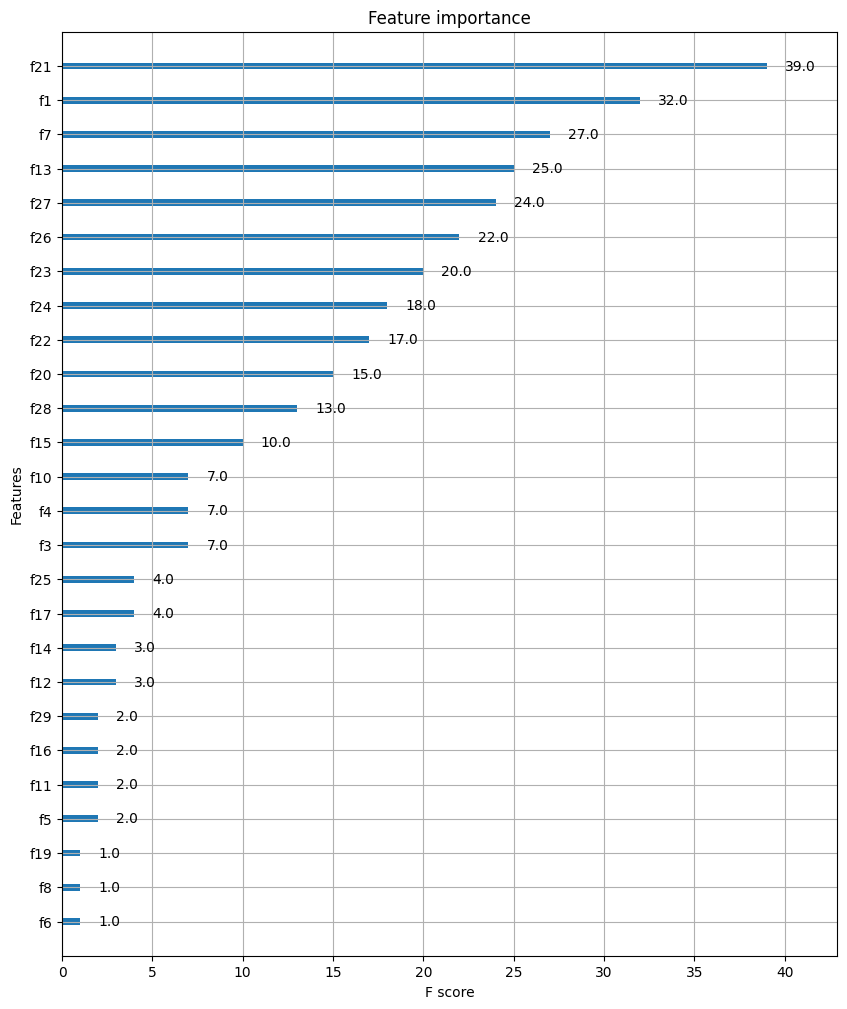

In [24]:
# page36

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)